# for Preprocessing NLP Data
- removing non alphabatic characters
- lowering the format
- tokeninzation
- remove stop words
- steming / lemitization
- spell correction


In [28]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
stemmer=PorterStemmer()

from wordcloud import WordCloud

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from autocorrect import Speller
spell=Speller()
from tqdm import tqdm
import re


In [7]:
# 1 point
# load the data from spam.csv
data = 0
# YOUR CODE HERE
data = pd.read_csv('spam.csv')

In [8]:
assert data.shape == (5572,5)

In [9]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [16]:
# 1 point
# drop the columns unnamed 2,3,4

# YOUR CODE HERE
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [17]:
assert data.shape == (5572,2)

In [18]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# 1 POINT
# rename the columns to labels and messages
# YOUR CODE HERE
data.columns = ['labels', 'messages']

In [20]:
assert data['labels'].shape == (5572,)
assert data['messages'].shape == (5572,)

In [21]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Lets Visualize the Spam words

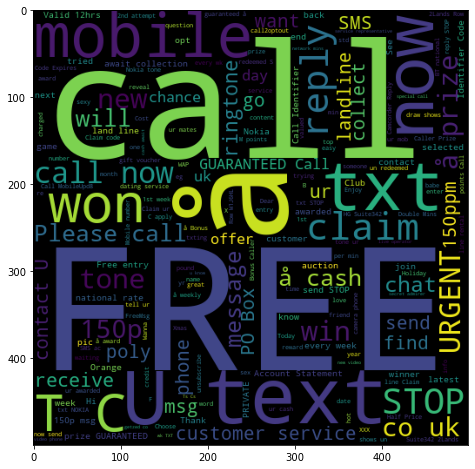

In [22]:
spam_words= ' '.join(list(data[data['labels']=='spam']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# Lets Visualize the Ham words

In [ ]:
spam_words= ' '.join(list(data[data['labels']=='ham']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# Preprocessing the Data

In [25]:
# 2 points 
# change the labels to 1 or 0 instead of 'spam' and 'ham'
# Encoding our Labels

# YOUR CODE HERE
data = data.replace({'spam':1, 'ham':0})

In [26]:
assert data['labels'][0] == 0
assert data['labels'][1] == 0
assert data['labels'][2] == 1

In [ ]:
# this part is given to you as a quick glance on the preprocessing in NLP

# preprocessing the Messages

nltk.download('punkt')
nltk.download('stopwords')

new_data=[]

for i in tqdm(range(data.shape[0])):
    lines=data.iloc[i,1]
    # removing non alphabatic characters
    lines= re.sub('[^A-Za-z]',' ',lines)
    # lowering the every word
    lines=lines.lower()
    
    # tokenization
    tokenized_lines=word_tokenize(lines)
    
    # removing stop words ,stemming and spell correction
    processed_lines=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
            
    final_lines=' '.join(processed_lines)
    new_data.append(final_lines)
    
            
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
  9%|▉         | 527/5572 [00:54<12:02,  6.98it/s]

In [ ]:
new_data

In [ ]:
len(new_data)

In [ ]:
Y=data['labels']
Y

In [ ]:
Y.value_counts()


# splitting the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

#1 points
# do the train test split, tested with random_state= = 0
# you will need to make sure your data is a numpy array
X_train, X_test, Y_train, Y_test = 0,0,0,0
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:

assert X_train.shape == (4457,)
assert X_test.shape == (1115,)
assert Y_train.shape == (4457,)
assert Y_test.shape == (1115,)

# Vectorization using Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer  #tf_idf
# 3 points
# use CountVectorizer to vectorize the data

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert len(X_test[0]) == 29
assert len(X_train[0]) == 36
assert len(X_train[3]) == 21
assert len(X_test[3]) == 58

In [ ]:
X_train_vect

In [ ]:
X_test_vect

# Lets train our Model - Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# 3 points

#train your model

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
model.classes_
assert model.classes_.shape == (2,)
assert model.classes_[0] == 0
assert model.classes_[1] == 1

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

#7 points

# predict and get the accuracy on test as well as the confusion matrix

acc = 0

conf_matrix = 0
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert Y_pred.shape == (1115,)
assert acc >= 80
assert conf_matrix[0][0] >= 3*conf_matrix[0][1]
assert conf_matrix[1][1] >= 3*conf_matrix[1][0]